# Uczenie Maszynowe 2 KNN

## Import bibliotek


In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Załadowanie zbiorów

### Zbiór Iris

In [3]:
iris = fetch_ucirepo(id=53)
  
iris_X = iris.data.features 
iris_y = iris.data.targets 

iris_df = pd.concat([iris_X, iris_y], axis=1)  

iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Wartości brakujące

In [4]:
iris_df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

#### Podsumowanie statystyczne zbioru Iris

In [5]:
iris_X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Ustandaryzowanie danych

Dodamy do pipeline'u standaryzację danych, przed przystąpieniem do trenowania modelu.


In [6]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_iris_X = scaler.fit_transform(iris_X)

# iris_X = pd.DataFrame(scaled_iris_X, columns=iris_X.columns)

# iris_X.describe()

### Zbiór Glass

In [7]:
glass_identification = fetch_ucirepo(id=42)

glass_X = glass_identification.data.features
glass_y = glass_identification.data.targets

glass_df = pd.concat([glass_X, glass_y], axis=1)

glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### Sprawdzenie brakujących wartości

In [8]:
glass_df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

#### Ustandaryzowanie danych

Dodamy do pipeline'u standaryzację danych, przed przystąpieniem do trenowania modelu.

In [9]:
# scaler = StandardScaler()
# scaled_glass_X = scaler.fit_transform(glass_X)

# glass_X = pd.DataFrame(scaled_glass_X, columns=glass_X.columns)

# glass_X.describe()

### Zbiór Wine

In [10]:
wine = fetch_ucirepo(id=109)

wine_X = wine.data.features
wine_y = wine.data.targets

wine_df = pd.concat([wine_X, wine_y], axis=1)

wine_df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [11]:
wine_df.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

#### Ustandaryzowanie danych

Dodamy do pipeline'u standaryzację danych, przed przystąpieniem do trenowania modelu.

In [12]:
# scaler = StandardScaler()
# scaled_wine_X = scaler.fit_transform(wine_X)

# wine_X = pd.DataFrame(scaled_wine_X, columns=wine_X.columns)

# wine_X.describe()

## Przebieg ćwiczenia

In [13]:
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [14]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


### Domyślne KNN dla zbioru Iris

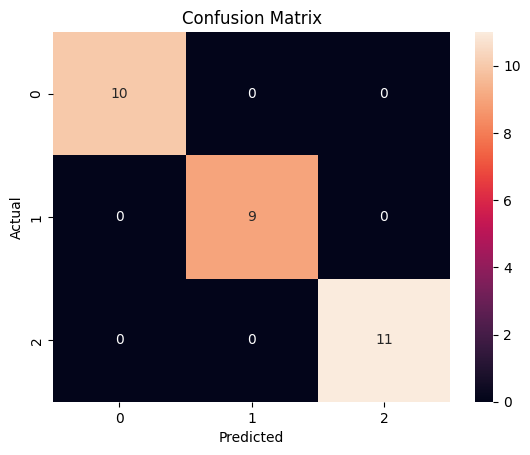

Accuracy: 1.0
F1 Score: 1.0


In [15]:
knn_default = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])


X_train, X_test, y_train, y_test = split_data(iris_X, iris_y.values.ravel(), random_state=42) # UWAGA NA SEED! sprawdzić 42 i 5

knn_default.fit(X_train, y_train)

y_pred = knn_default.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# f-score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1}")

### Implementacja procedury walidacji krzyżowej (ang. crossvalidation) dla różnych rozmiarów,

 tj. 2-fold, 5-fold, 10-fold i sprawdzenie jak wpływa na wyniki klasyfikatora k-nn dla zbioru IRIS.

In [16]:
def cross_validation_knn(knn, X, y, num_folds_list, shuffle=True):
    results = {}
    for num_folds in num_folds_list:
        if shuffle:
            kf = KFold(n_splits=num_folds, shuffle=shuffle, random_state=42)
        else:
            kf = KFold(n_splits=num_folds, shuffle=shuffle)

        scores = cross_val_score(knn, X, y, cv=kf, scoring='f1_macro')
        results[num_folds] = scores
        print(
            f"Średnia skuteczność dla {num_folds}-fold cross-validation: {scores.mean():.4f}\n"
            f"Odchylenie standardowe: {scores.std():.4f} \n"
        )
    return results

Średnia skuteczność dla 2-fold cross-validation: 0.9535
Odchylenie standardowe: 0.0029 

Średnia skuteczność dla 3-fold cross-validation: 0.9489
Odchylenie standardowe: 0.0288 

Średnia skuteczność dla 4-fold cross-validation: 0.9389
Odchylenie standardowe: 0.0509 

Średnia skuteczność dla 5-fold cross-validation: 0.9599
Odchylenie standardowe: 0.0300 

Średnia skuteczność dla 6-fold cross-validation: 0.9459
Odchylenie standardowe: 0.0489 

Średnia skuteczność dla 7-fold cross-validation: 0.9397
Odchylenie standardowe: 0.0800 

Średnia skuteczność dla 8-fold cross-validation: 0.9456
Odchylenie standardowe: 0.0539 

Średnia skuteczność dla 9-fold cross-validation: 0.9436
Odchylenie standardowe: 0.0690 

Średnia skuteczność dla 10-fold cross-validation: 0.9516
Odchylenie standardowe: 0.0735 

Średnia skuteczność dla 11-fold cross-validation: 0.9453
Odchylenie standardowe: 0.0771 

Średnia skuteczność dla 12-fold cross-validation: 0.9359
Odchylenie standardowe: 0.0703 

Średnia skutecznoś

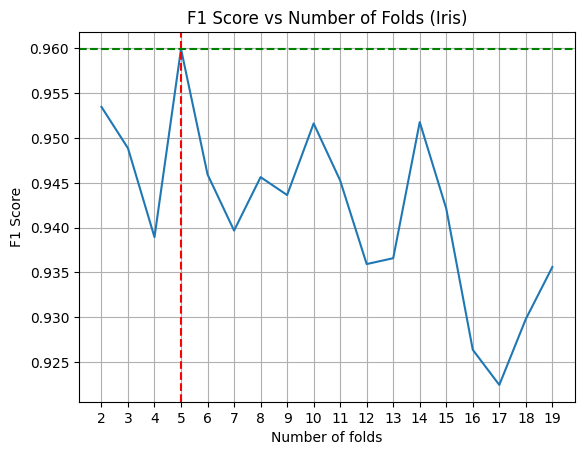

In [17]:
knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
num_folds_list = range(2, 20)

results = cross_validation_knn(

    knn, iris_X, iris_y.values.ravel(), num_folds_list, shuffle=True
)

result_means = [np.mean(results[num_folds]) for num_folds in results.keys()]
best_num_folds = max(results, key=lambda x: np.mean(results[x]))
best_f1_score = np.mean(results[best_num_folds])
print(f"Best number of folds: {best_num_folds}")
print(f"Best F1 Score: {best_f1_score}")

plt.plot(list(results.keys()), list(result_means))
plt.axvline(x=best_num_folds, color='r', linestyle='--')
plt.axhline(y=best_f1_score, color="g", linestyle="--")
plt.xticks(list(results.keys()))
plt.xlabel("Number of folds")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Number of Folds (Iris)")
plt.grid()
plt.show()

Jak wpływa "Shuffle" na wyniki klasyfikatora k-nn dla zbioru IRIS. - a raczej jego brak?

Średnia skuteczność dla 2-fold cross-validation: 0.2032
Odchylenie standardowe: 0.0468 

Średnia skuteczność dla 3-fold cross-validation: 0.0000
Odchylenie standardowe: 0.0000 

Średnia skuteczność dla 4-fold cross-validation: 0.7414
Odchylenie standardowe: 0.2293 

Średnia skuteczność dla 5-fold cross-validation: 0.7592
Odchylenie standardowe: 0.2671 

Średnia skuteczność dla 6-fold cross-validation: 0.6430
Odchylenie standardowe: 0.2529 

Średnia skuteczność dla 7-fold cross-validation: 0.7636
Odchylenie standardowe: 0.2588 

Średnia skuteczność dla 8-fold cross-validation: 0.7257
Odchylenie standardowe: 0.2592 

Średnia skuteczność dla 9-fold cross-validation: 0.7591
Odchylenie standardowe: 0.2696 

Średnia skuteczność dla 10-fold cross-validation: 0.7300
Odchylenie standardowe: 0.2702 

Średnia skuteczność dla 11-fold cross-validation: 0.7919
Odchylenie standardowe: 0.2547 

Średnia skuteczność dla 12-fold cross-validation: 0.7335
Odchylenie standardowe: 0.2667 

Średnia skutecznoś

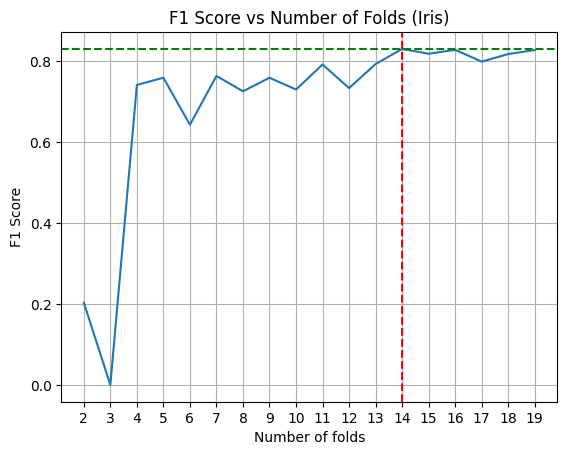

In [18]:
results = cross_validation_knn(
    knn, iris_X, iris_y.values.ravel(), num_folds_list, shuffle=False
)

result_no_shuffle_means = [np.mean(results[num_folds]) for num_folds in results.keys()]
best_num_folds_no_shuffle = max(results, key=lambda x: np.mean(results[x]))
best_f1_score_no_shuffle = np.mean(results[best_num_folds_no_shuffle])
print(f"Best number of folds: {best_num_folds_no_shuffle}")
print(f"Best F1 Score: {best_f1_score_no_shuffle}")


plt.plot(list(results.keys()), result_no_shuffle_means)
plt.axvline(x=best_num_folds_no_shuffle, color='r', linestyle='--')
plt.axhline(y=best_f1_score_no_shuffle, color="g", linestyle="--")
plt.xticks(list(results.keys()))
plt.xlabel("Number of folds")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Number of Folds (Iris)")
plt.grid()
plt.show()

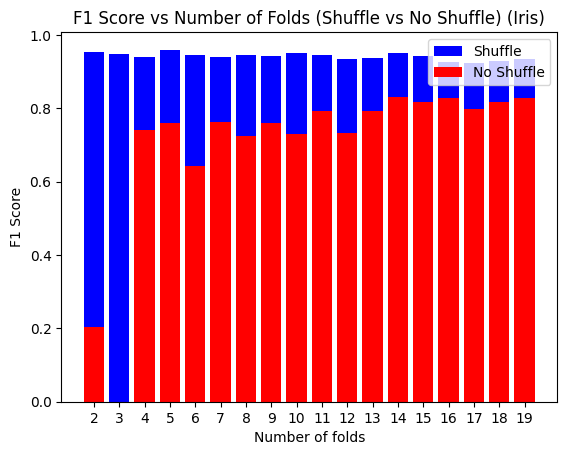

In [19]:
fig, ax = plt.subplots()

ax.bar(list(results.keys()), result_means, color='b', label='Shuffle')
ax.bar(list(results.keys()), result_no_shuffle_means, color='r', label='No Shuffle')
ax.set_xticks(list(results.keys()))
ax.set_ylabel('F1 Score')
ax.set_xlabel('Number of folds')
ax.set_title('F1 Score vs Number of Folds (Shuffle vs No Shuffle) (Iris)')
ax.legend()

plt.show()


LOO - czyli Leave-One-Out

In [20]:
def cross_validation_knn_loo(knn, X, y):
    kf = LeaveOneOut()
    scores = cross_val_score(knn, X, y, cv=kf, scoring="f1_macro")
    print(
        f"Średnia skuteczność dla Leave-One-Out cross-validation: {scores.mean():.4f}\n"
        f"Odchylenie standardowe: {scores.std():.4f} \n"
    )
    return scores


In [21]:
loo_results = cross_validation_knn_loo(knn, iris_X, iris_y.values.ravel())

Średnia skuteczność dla Leave-One-Out cross-validation: 0.9467
Odchylenie standardowe: 0.2247 



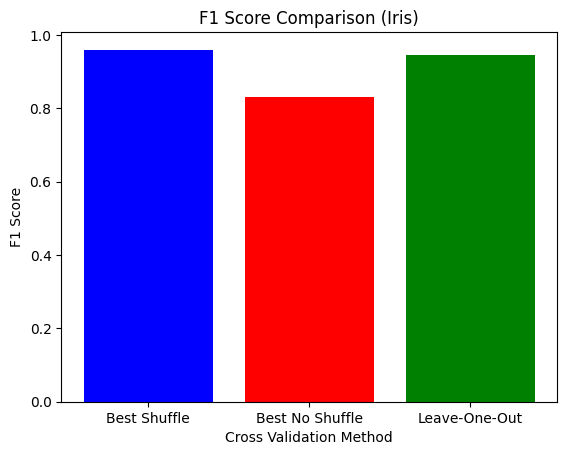

In [22]:
# compare bar plot of best shuffle vs best no shuffle vs loo

fig, ax = plt.subplots()

ax.bar(
    ["Best Shuffle", "Best No Shuffle", "Leave-One-Out"],
    [best_f1_score, best_f1_score_no_shuffle, loo_results.mean()],
    color=["b", "r", "g"],
)
ax.set_ylabel('F1 Score')
ax.set_xlabel('Cross Validation Method')
ax.set_title('F1 Score Comparison (Iris)')
plt.show()

 Pytanie pomocnicze nr 1: czy powinno używać się procedury mieszania danych (tj. shuffle)?

    - tak jak najbardziej, ponieważ dane mogą być uporządkowane i wtedy wyniki walidacji krzyżowej mogą być błędne
    
 Pytanie pomocnicze nr 2: czy warto rozważyć użycie walidacji krzyżowej typu leave-one-out?
 
    - to zależy od rozmiaru danych, LOO jest dobre dla małych zbiorów danych, ale dla dużych zbiorów danych jest to bardzo kosztowne obliczeniowo. 

Sprawdzenie różnych wartości parametrów klasyfikatora k-nn dla zbioru IRIS:
* liczba k, od 1-15
* 3 sposoby głosowania
* 3 miary odległości w przestrzeni danych– warto sprawdzić nie tylko odległość Euklidesa, Manhattańska, ale także miarę Minkowskiego, Mahalanobis’a czy Czybyszewa

In [23]:
def test_knn(
    X,
    y,
    n_neighbors=5,
    num_folds=5,
    weights="uniform",
    algorithm="auto",
    metric="euclidean",
):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    knn = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, metric=metric))
    ])
    scores = cross_val_score(knn, X, y, cv=kf, scoring="f1_macro")
    f1 = scores.mean()
    print(f"Number of Neighbors: {n_neighbors}")
    print(f"Voting Method: {weights}")
    print(f"Distance Metric: {metric}")
    print(f"F1 Score: {f1}")
    print("")
    return f1

Test K (1-15) Iris

Number of Neighbors: 1
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9411626789286364

Number of Neighbors: 2
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9048481916406443

Number of Neighbors: 3
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9411309743535657

Number of Neighbors: 4
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9186813186813186

Number of Neighbors: 5
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9534766533659115

Number of Neighbors: 6
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9324601418751549

Number of Neighbors: 7
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9669549266247379

Number of Neighbors: 8
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9461022927689595

Number of Neighbors: 9
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.974225325650456

Number of Neighbors: 10
Voting Method: uniform
Distance Metric: euclidean


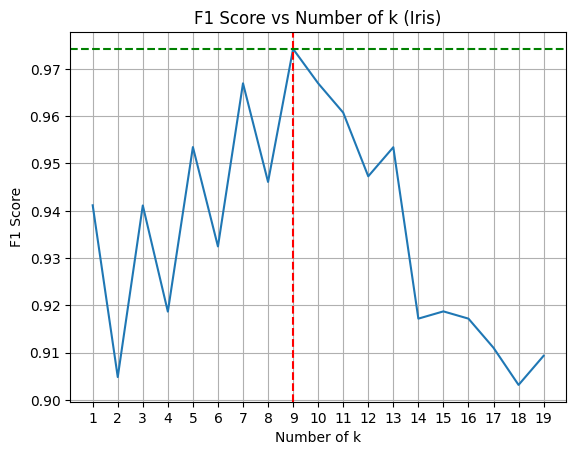

In [24]:
results = {}
best_f1 = 0
best_k = 0
k_list = range(1, 20)
for k in k_list:
    f1 = test_knn(iris_X, iris_y.values.ravel(), n_neighbors=k, num_folds=2)
    if f1 > best_f1:
        best_f1 = f1
        best_k = k
    results[k] = f1

print(f"Best F1 Score: {best_f1}")
print(f"Best Number of Neighbors: {best_k}")

plt.plot(list(results.keys()), list(results.values()))
plt.axvline(x=best_k, color="r", linestyle="--")
plt.axhline(y=best_f1, color="g", linestyle="--")
plt.xlabel("Number of k")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Number of k (Iris)")
plt.xticks(list(results.keys()))
plt.grid()
plt.show()

Tutaj idealnie widać spadki przy parzystych wartościach k, co jest związane z głosowaniem w przypadku remisu.

### Jak wybierać K? - przepis

* a) wybór K jako pierwiastek z liczby obserwacji
* b) do wyniku + - 1 aby mieć nieprzrzystą liczbę sąsiadów, aby uniknąć remisów!

### Badanie sposobu głosowania


In [25]:
def custom_gaussian_kernel(distances):
    sigma = 0.5 
    weights = np.exp(-(distances**2) / (2 * sigma**2))
    return weights

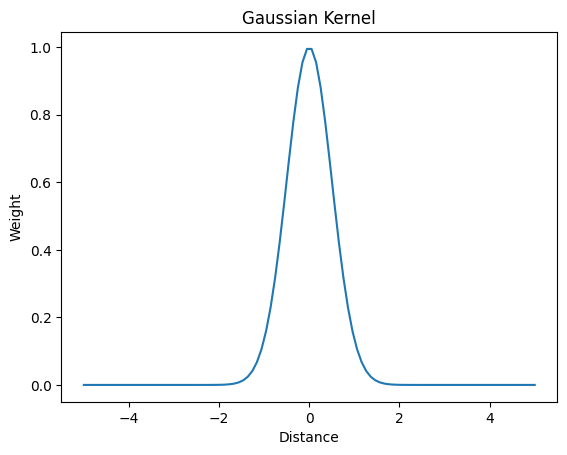

In [26]:
distances = np.linspace(-5,5, 100)
weights = custom_gaussian_kernel(distances)
plt.plot(distances, weights)
plt.xlabel('Distance')
plt.ylabel('Weight')
plt.title('Gaussian Kernel')
plt.show()

Number of Neighbors: 9
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9460479987848409

Number of Neighbors: 9
Voting Method: distance
Distance Metric: euclidean
F1 Score: 0.9673737744584427

Number of Neighbors: 9
Voting Method: <function custom_gaussian_kernel at 0x0000021B17FD8400>
Distance Metric: euclidean
F1 Score: 0.9673737744584427

-----------------
Best F1 Score: 0.9673737744584427
Best Voting Method: distance


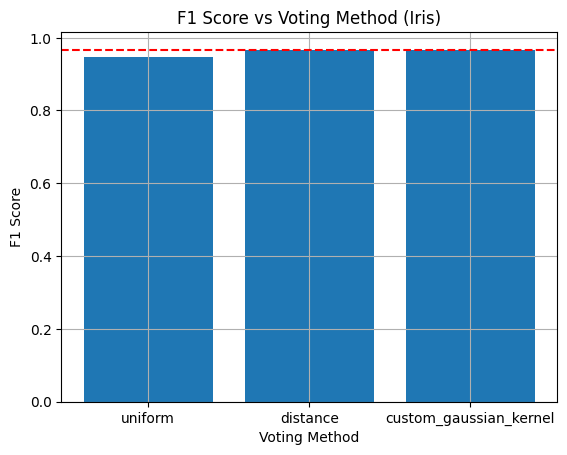

In [34]:
voting_methods = ["uniform", "distance", custom_gaussian_kernel]
voting_methods_str = ["uniform", "distance", "custom_gaussian_kernel"]
results = {}
best_f1 = 0
best_method = ""


for method in voting_methods:


    f1 = test_knn(
        iris_X, iris_y.values.ravel(), weights=method, num_folds=5, n_neighbors=9
    )


    if f1 > best_f1:
        best_f1 = f1
        best_method = method


    results[method] = f1

print("-----------------")



print(f"Best F1 Score: {best_f1}")



print(f"Best Voting Method: {best_method}")


# make results.keys() a list of strings


plt.bar(voting_methods_str, results.values())
plt.axhline(y=best_f1, color="r", linestyle="--")
plt.xticks(voting_methods_str)
plt.ylabel("F1 Score")
plt.xlabel("Voting Method")
plt.title("F1 Score vs Voting Method (Iris)")
plt.grid()

plt.show()

### Badanie miar odległości

Number of Neighbors: 9
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9460479987848409

Number of Neighbors: 9
Voting Method: uniform
Distance Metric: manhattan
F1 Score: 0.945082752786616

Number of Neighbors: 9
Voting Method: uniform
Distance Metric: minkowski
F1 Score: 0.9460479987848409

Number of Neighbors: 9
Voting Method: uniform
Distance Metric: chebyshev
F1 Score: 0.9460943968312389

-----------------------
Best F1 Score: 0.9460943968312389
Best Distance Metric: chebyshev


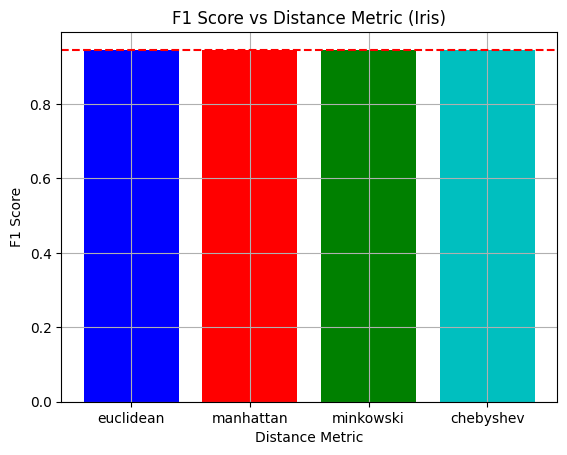

In [35]:
distance_metrics = ["euclidean", "manhattan", "minkowski", "chebyshev"]
best_f1 = 0
best_metric = ""
results = {}
for metric in distance_metrics:

    f1 = test_knn(
        iris_X,
        iris_y.values.ravel(),
        metric=metric,
        num_folds=5,
        n_neighbors=9,
        weights="uniform",
    )
    if f1 > best_f1:
        best_f1 = f1
        best_metric = metric
    results[metric] = f1

print("-----------------------")

print(f"Best F1 Score: {best_f1}")
print(f"Best Distance Metric: {best_metric}")

plt.bar(list(results.keys()), list(results.values()), color=["b", "r", "g", "c"])
plt.axhline(y=best_f1, color="r", linestyle="--")
plt.xticks(list(results.keys()))
plt.ylabel("F1 Score")
plt.xlabel("Distance Metric")
plt.title("F1 Score vs Distance Metric (Iris)")
plt.grid()

plt.show()

Najlepsza "zachłanna" konfiguracja klasyfikatora k-nn dla zbioru IRIS

* K = 9
* Sposób głosowania: większościowe 
* Miara odległości: ... wszytsite taj samo?

## Uruchomienie k-nn dla trzech badanych zbiorów

## Zbiór Glass

### Klasyczne KNN dla zbioru Glass

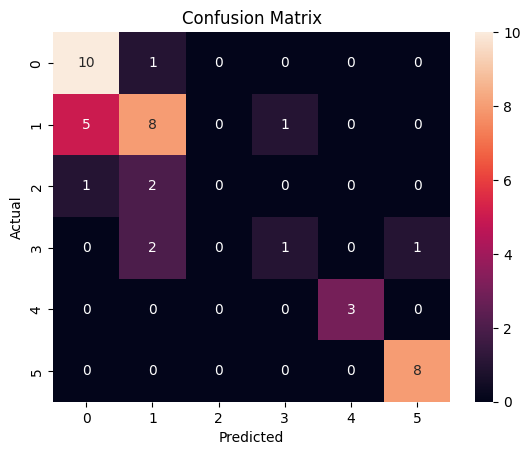

Accuracy: 0.6976744186046512
F1 Score: 0.6013071895424836


In [36]:
knn = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
)


X_train, X_test, y_train, y_test = split_data(glass_X, glass_y.values.ravel())


knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# f-score
f1 = f1_score(y_test, y_pred, average="macro")
print(f"F1 Score: {f1}")

### Badanie rozmiaru foldów dla zbioru Glass

Średnia skuteczność dla 2-fold cross-validation: 0.4999
Odchylenie standardowe: 0.0240 

Średnia skuteczność dla 3-fold cross-validation: 0.5508
Odchylenie standardowe: 0.0234 

Średnia skuteczność dla 4-fold cross-validation: 0.5762
Odchylenie standardowe: 0.0419 

Średnia skuteczność dla 5-fold cross-validation: 0.5703
Odchylenie standardowe: 0.0551 

Średnia skuteczność dla 6-fold cross-validation: 0.5629
Odchylenie standardowe: 0.1036 

Średnia skuteczność dla 7-fold cross-validation: 0.5605
Odchylenie standardowe: 0.0735 

Średnia skuteczność dla 8-fold cross-validation: 0.5397
Odchylenie standardowe: 0.1020 

Średnia skuteczność dla 9-fold cross-validation: 0.4974
Odchylenie standardowe: 0.1545 

Średnia skuteczność dla 10-fold cross-validation: 0.5106
Odchylenie standardowe: 0.1180 

Średnia skuteczność dla 11-fold cross-validation: 0.5479
Odchylenie standardowe: 0.1141 

Średnia skuteczność dla 12-fold cross-validation: 0.5318
Odchylenie standardowe: 0.1445 

Średnia skutecznoś

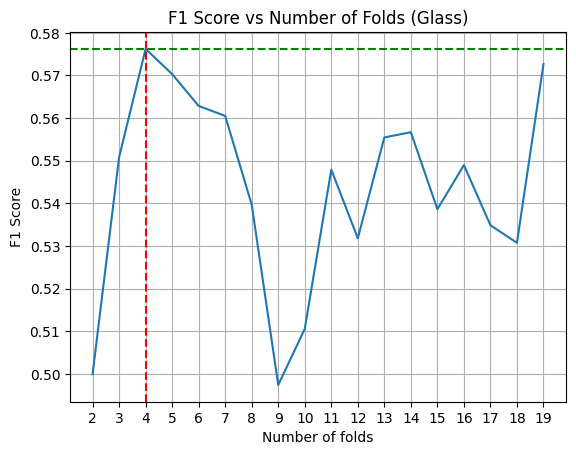

In [37]:
knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

num_folds_list = range(2, 20)

results = cross_validation_knn(
    knn, glass_X, glass_y.values.ravel(), num_folds_list, shuffle=True
)

result_means = [np.mean(results[num_folds]) for num_folds in results.keys()]
best_num_folds = max(results, key=lambda x: np.mean(results[x]))
best_f1_score = np.mean(results[best_num_folds])
print(f"Best number of folds: {best_num_folds}")
print(f"Best F1 Score: {best_f1_score}")

plt.plot(list(results.keys()), list(result_means))
plt.axvline(x=best_num_folds, color="r", linestyle="--")
plt.axhline(y=best_f1_score, color="g", linestyle="--")
plt.xticks(list(results.keys()))
plt.xlabel("Number of folds")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Number of Folds (Glass)")
plt.grid()
plt.show()

### Badanie różnych wartości K dla zbioru Glass

Number of Neighbors: 1
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.6677773851618711

Number of Neighbors: 2
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.5855665306633774

Number of Neighbors: 3
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.6126069111633787

Number of Neighbors: 4
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.6043490582362533

Number of Neighbors: 5
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.5762259194829251

Number of Neighbors: 6
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.5462105908235604

Number of Neighbors: 7
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.5642902360474886

Number of Neighbors: 8
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.5495352856566093

Number of Neighbors: 9
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.53933301785138

Number of Neighbors: 10
Voting Method: uniform
Distance Metric: euclidean
F

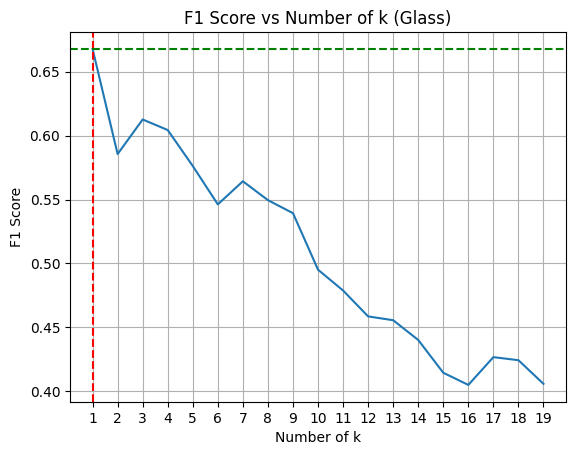

In [38]:
results = {}
best_f1 = 0
best_k = 0
k_list = range(1, 20)
for k in k_list:
    f1 = test_knn(glass_X, glass_y.values.ravel(), n_neighbors=k, num_folds=4)
    if f1 > best_f1:
        best_f1 = f1
        best_k = k
    results[k] = f1

print(f"Best F1 Score: {best_f1}")
print(f"Best Number of Neighbors: {best_k}")

plt.plot(list(results.keys()), list(results.values()))
plt.axvline(x=best_k, color="r", linestyle="--")
plt.axhline(y=best_f1, color="g", linestyle="--")
plt.xlabel("Number of k")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Number of k (Glass)")
plt.xticks(list(results.keys()))
plt.grid()
plt.show()


### Badanie różnych sposobów głosowania dla zbioru Glass

Number of Neighbors: 3
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.6126069111633787

Number of Neighbors: 3
Voting Method: distance
Distance Metric: euclidean
F1 Score: 0.6476062374438957

Number of Neighbors: 3
Voting Method: <function custom_gaussian_kernel at 0x0000021B17FD8400>
Distance Metric: euclidean
F1 Score: 0.6667244799666173

-----------------
Best F1 Score: 0.6667244799666173
Best Voting Method: <function custom_gaussian_kernel at 0x0000021B17FD8400>


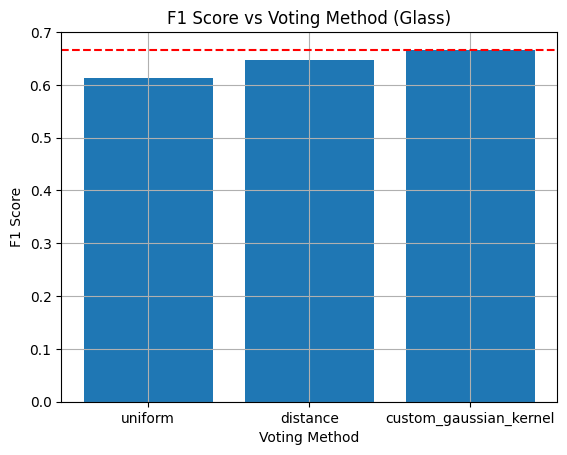

In [44]:
voting_methods = ["uniform", "distance", custom_gaussian_kernel]
voting_methods_str = ["uniform", "distance", "custom_gaussian_kernel"]
results = {}
best_f1 = 0
best_method = ""
for method in voting_methods:
    f1 = test_knn(
        glass_X, glass_y.values.ravel(), weights=method, num_folds=4, n_neighbors=3
    )
    if f1 > best_f1:
        best_f1 = f1
        best_method = method
    results[method] = f1

print("-----------------")
print(f"Best F1 Score: {best_f1}")
print(f"Best Voting Method: {best_method}")

plt.bar(voting_methods_str, list(results.values()))
plt.axhline(y=best_f1, color="r", linestyle="--")
plt.xticks(voting_methods_str)
plt.ylabel("F1 Score")
plt.xlabel("Voting Method")
plt.title("F1 Score vs Voting Method (Glass)")
plt.grid()

plt.show()

### Badanie różnych miar odległości dla zbioru Glass

Number of Neighbors: 3
Voting Method: <function custom_gaussian_kernel at 0x0000021B17FD8400>
Distance Metric: euclidean
F1 Score: 0.6667244799666173

Number of Neighbors: 3
Voting Method: <function custom_gaussian_kernel at 0x0000021B17FD8400>
Distance Metric: manhattan
F1 Score: 0.6822904051715971

Number of Neighbors: 3
Voting Method: <function custom_gaussian_kernel at 0x0000021B17FD8400>
Distance Metric: minkowski
F1 Score: 0.6667244799666173

Number of Neighbors: 3
Voting Method: <function custom_gaussian_kernel at 0x0000021B17FD8400>
Distance Metric: chebyshev
F1 Score: 0.6303163169061662

-----------------------
Best F1 Score: 0.6822904051715971
Best Distance Metric: manhattan


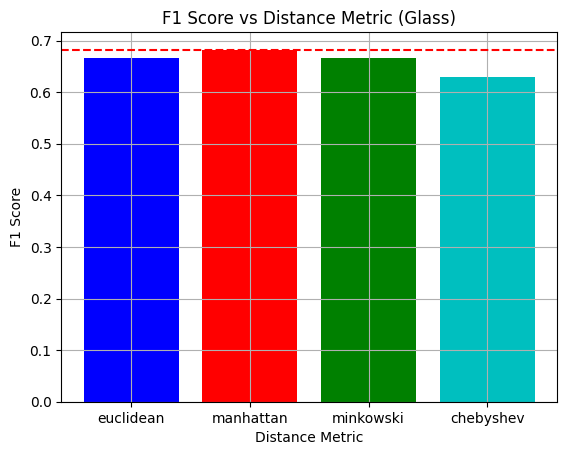

In [45]:
distance_metrics = ["euclidean", "manhattan", "minkowski", "chebyshev"]
best_f1 = 0
best_metric = ""
results = {}
for metric in distance_metrics:

    f1 = test_knn(
        glass_X,
        glass_y.values.ravel(),
        metric=metric,
        num_folds=4,
        n_neighbors=3,
        weights=custom_gaussian_kernel,
    )
    if f1 > best_f1:
        best_f1 = f1
        best_metric = metric
    results[metric] = f1

print("-----------------------")

print(f"Best F1 Score: {best_f1}")
print(f"Best Distance Metric: {best_metric}")

plt.bar(list(results.keys()), list(results.values()), color=["b", "r", "g", "c"])
plt.axhline(y=best_f1, color="r", linestyle="--")
plt.xticks(list(results.keys()))
plt.ylabel("F1 Score")
plt.xlabel("Distance Metric")
plt.title("F1 Score vs Distance Metric (Glass)")
plt.grid()

plt.show()

Najelpsza "zachłanna" konfiguracja dla zbioru Glass:

* liczba K = 3
* Voting = Gaussian kernel
* Distance = manhattan


## Wine


### Klasyczne KNN dla zbioru Wine

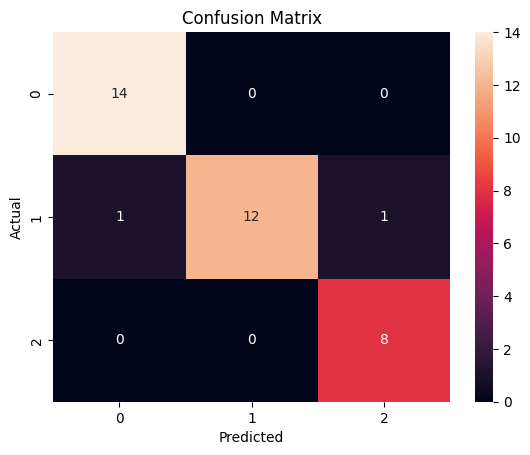

Accuracy: 0.9444444444444444
F1 Score: 0.9432568783481562


In [46]:
knn = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
)

X_train, X_test, y_train, y_test = split_data(wine_X, wine_y.values.ravel(), random_state=42) #UWAGA NA SEED 5: 97% , 42: 94%

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y_test, y_pred, average="macro")
print(f"F1 Score: {f1}")

### Badanie rozmiaru foldów dla zbioru Wine

Średnia skuteczność dla 2-fold cross-validation: 0.9517
Odchylenie standardowe: 0.0046 

Średnia skuteczność dla 3-fold cross-validation: 0.9632
Odchylenie standardowe: 0.0092 

Średnia skuteczność dla 4-fold cross-validation: 0.9455
Odchylenie standardowe: 0.0239 



Średnia skuteczność dla 5-fold cross-validation: 0.9504
Odchylenie standardowe: 0.0208 

Średnia skuteczność dla 6-fold cross-validation: 0.9678
Odchylenie standardowe: 0.0191 

Średnia skuteczność dla 7-fold cross-validation: 0.9674
Odchylenie standardowe: 0.0248 

Średnia skuteczność dla 8-fold cross-validation: 0.9615
Odchylenie standardowe: 0.0345 

Średnia skuteczność dla 9-fold cross-validation: 0.9709
Odchylenie standardowe: 0.0262 

Średnia skuteczność dla 10-fold cross-validation: 0.9651
Odchylenie standardowe: 0.0378 

Średnia skuteczność dla 11-fold cross-validation: 0.9575
Odchylenie standardowe: 0.0332 

Średnia skuteczność dla 12-fold cross-validation: 0.9624
Odchylenie standardowe: 0.0473 

Średnia skuteczność dla 13-fold cross-validation: 0.9721
Odchylenie standardowe: 0.0444 

Średnia skuteczność dla 14-fold cross-validation: 0.9555
Odchylenie standardowe: 0.0472 

Średnia skuteczność dla 15-fold cross-validation: 0.9597
Odchylenie standardowe: 0.0600 

Średnia skutecz

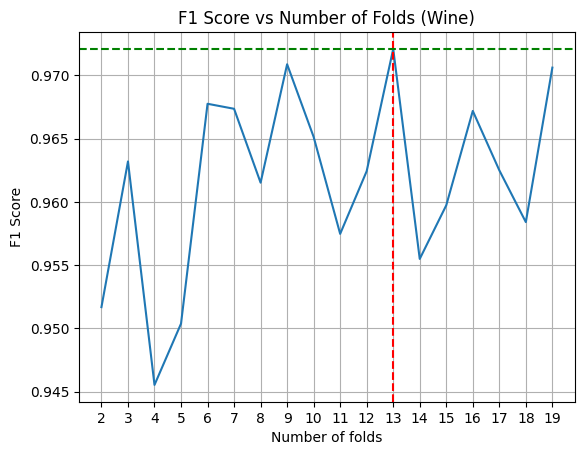

In [48]:
knn = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
)

num_folds_list = range(2, 20)

results = cross_validation_knn(
    knn, wine_X, wine_y.values.ravel(), num_folds_list, shuffle=True
)

result_means = [np.mean(results[num_folds]) for num_folds in results.keys()]
best_num_folds = max(results, key=lambda x: np.mean(results[x]))
best_f1_score = np.mean(results[best_num_folds])
print(f"Best number of folds: {best_num_folds}")
print(f"Best F1 Score: {best_f1_score}")

plt.plot(list(results.keys()), list(result_means))
plt.axvline(x=best_num_folds, color="r", linestyle="--")
plt.axhline(y=best_f1_score, color="g", linestyle="--")
plt.xticks(list(results.keys()))
plt.xlabel("Number of folds")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Number of Folds (Wine)")
plt.grid()
plt.show()

### Badanie różnych wartości K dla zbioru Wine

Number of Neighbors: 1
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9506789506789506

Number of Neighbors: 2
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.933444048828664

Number of Neighbors: 3
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9504347504347503

Number of Neighbors: 4
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9405150405150404

Number of Neighbors: 5
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9720918457760562

Number of Neighbors: 6
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9501730238572343

Number of Neighbors: 7
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9555972292814398

Number of Neighbors: 8
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9502248239090344

Number of Neighbors: 9
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9555972292814398

Number of Neighbors: 10
Voting Method: uniform
Distance Metric: euclidean


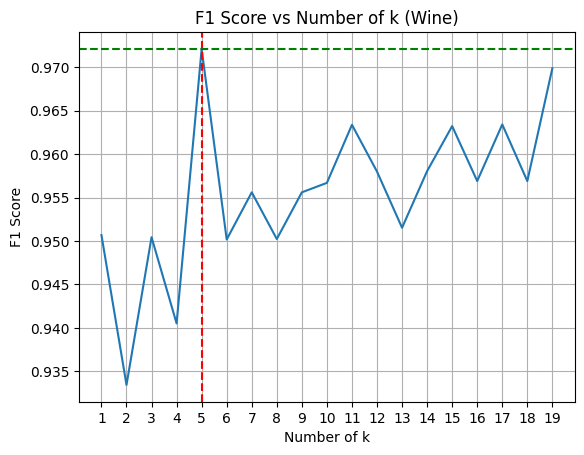

In [49]:
results = {}
best_f1 = 0
best_k = 0
k_list = range(1, 20)
for k in k_list:
    f1 = test_knn(wine_X, wine_y.values.ravel(), n_neighbors=k, num_folds=13)
    if f1 > best_f1:
        best_f1 = f1
        best_k = k
    results[k] = f1

print(f"Best F1 Score: {best_f1}")
print(f"Best Number of Neighbors: {best_k}")

plt.plot(list(results.keys()), list(results.values()))
plt.axvline(x=best_k, color="r", linestyle="--")
plt.axhline(y=best_f1, color="g", linestyle="--")
plt.xlabel("Number of k")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Number of k (Wine)")
plt.xticks(list(results.keys()))
plt.grid()
plt.show()

### Badanie różnych sposobów głosowania dla zbioru Wine

Number of Neighbors: 5
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9720918457760562

Number of Neighbors: 5
Voting Method: distance
Distance Metric: euclidean
F1 Score: 0.9720918457760562

Number of Neighbors: 5
Voting Method: <function custom_gaussian_kernel at 0x0000021B17FD8400>
Distance Metric: euclidean
F1 Score: 0.9506789506789506

-----------------
Best F1 Score: 0.9720918457760562
Best Voting Method: uniform


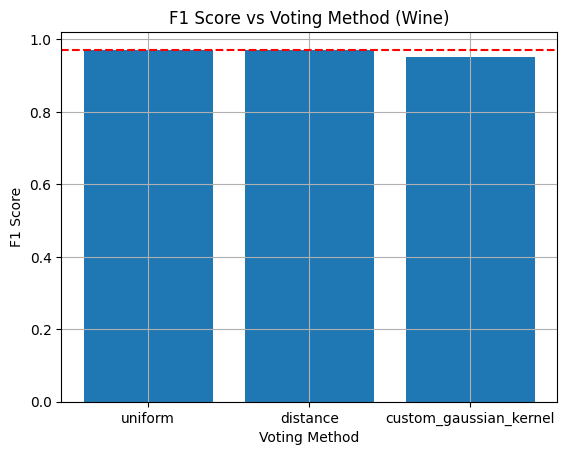

In [50]:
voting_methods = ["uniform", "distance", custom_gaussian_kernel]
voting_methods_str = ["uniform", "distance", "custom_gaussian_kernel"]
results = {}
best_f1 = 0
best_method = ""
for method in voting_methods:
    f1 = test_knn(
        wine_X, wine_y.values.ravel(), weights=method, num_folds=13, n_neighbors=5 #?
    )
    if f1 > best_f1:
        best_f1 = f1
        best_method = method
    results[method] = f1

print("-----------------")
print(f"Best F1 Score: {best_f1}")
print(f"Best Voting Method: {best_method}")

plt.bar(voting_methods_str, list(results.values()))
plt.axhline(y=best_f1, color="r", linestyle="--")
plt.xticks(voting_methods_str)
plt.ylabel("F1 Score")
plt.xlabel("Voting Method")
plt.title("F1 Score vs Voting Method (Wine)")
plt.grid()

plt.show()

### Badanie różnych miar odległości dla zbioru Wine

Number of Neighbors: 5
Voting Method: uniform
Distance Metric: euclidean
F1 Score: 0.9720918457760562

Number of Neighbors: 5
Voting Method: uniform
Distance Metric: manhattan
F1 Score: 0.9619797356639462

Number of Neighbors: 5
Voting Method: uniform
Distance Metric: minkowski
F1 Score: 0.9720918457760562

Number of Neighbors: 5
Voting Method: uniform
Distance Metric: chebyshev
F1 Score: 0.9187500575509626

-----------------------
Best F1 Score: 0.9720918457760562
Best Distance Metric: euclidean


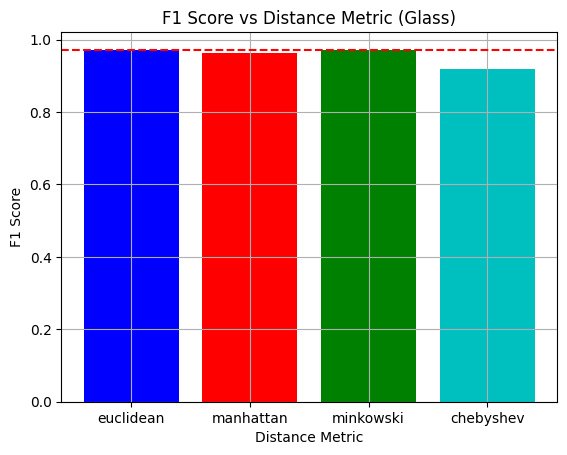

In [53]:
distance_metrics = ["euclidean", "manhattan", "minkowski", "chebyshev"]
best_f1 = 0
best_metric = ""
results = {}

for metric in distance_metrics:

    f1 = test_knn(
        wine_X,
        wine_y.values.ravel(),
        metric=metric,
        num_folds=13,
        n_neighbors=5,
        weights='uniform',
    )
    if f1 > best_f1:
        best_f1 = f1
        best_metric = metric
    results[metric] = f1

print("-----------------------")

print(f"Best F1 Score: {best_f1}")
print(f"Best Distance Metric: {best_metric}")

plt.bar(list(results.keys()), list(results.values()), color=["b", "r", "g", "c"])
plt.axhline(y=best_f1, color="r", linestyle="--")
plt.xticks(list(results.keys()))
plt.ylabel("F1 Score")
plt.xlabel("Distance Metric")
plt.title("F1 Score vs Distance Metric (Glass)")
plt.grid()

plt.show()

Najelpsza "zachłanna" konfiguracja dla zbioru Wine:

* liczba K = 5 
* Voting = wiekszosciowe
* Distance = euclidean, manhattan


## Sprawdzenie skuteczności klasyfikacji dla różnych zestawów wartości parametrów dla 3 różnych zbiorów

In [61]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 20))
weight_options = ["uniform", "distance", custom_gaussian_kernel]
distance_metrics = ["euclidean", "manhattan", "minkowski", "chebyshev"]
num_folds = 7

param_grid = dict(
    knn__n_neighbors=k_range, knn__weights=weight_options, knn__metric=distance_metrics
)

In [62]:
def gird_search(X, y, param_grid, num_folds=5) -> GridSearchCV:
    knn = Pipeline(
        [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
    )
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    grid = GridSearchCV(
        knn, param_grid, cv=kf, scoring="f1_macro", return_train_score=False
    )
    grid.fit(X, y.values.ravel())
    print(grid.best_score_)
    print(grid.best_params_)
    return grid

### Iris GridSearch

In [63]:
iris_grid = gird_search(iris_X, iris_y , param_grid, num_folds)

0.9713393331814384
{'knn__metric': 'euclidean', 'knn__n_neighbors': 13, 'knn__weights': 'distance'}


Number of Neighbors: 9

Voting Method: uniform

Distance Metric: euclidean

F1 Score: 0.9460479987848409

### Glass GridSearch

In [64]:
glass_grid = gird_search(glass_X, glass_y, param_grid, num_folds)

0.6833740565973321
{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': <function custom_gaussian_kernel at 0x0000021B17FD8400>}


Number of Neighbors: 3

Voting Method: <function custom_gaussian_kernel at 0x0000021B17FD8400>

Distance Metric: manhattan

F1 Score: 0.6822904051715971

### Wine GridSearch

In [65]:
wine_grid = gird_search(wine_X, wine_y, param_grid, num_folds)

0.9743847012489206
{'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}


Number of Neighbors: 5

Voting Method: uniform

Distance Metric: euclidean

F1 Score: 0.9720918457760562

## Zbadać jak/czy zmienia się skuteczność klasyfikacji k-nn dla badanych zbiorów jeśli zastosowana zostanie walidacja stratyfikowana? Dlacze


### Iris GridSearch Stratified

In [66]:
from sklearn.model_selection import StratifiedKFold

def gird_search_stratified(X,y,param_grid, num_folds=5) -> GridSearchCV: 
    knn = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])
    ksf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    grid = GridSearchCV(
        knn, param_grid, cv=ksf, scoring="f1_macro", return_train_score=False
    )
    grid.fit(X, y.values.ravel())
    print(grid.best_score_)
    print(grid.best_params_)
    return grid

In [67]:
iris_stratifed = gird_search_stratified(iris_X, iris_y, param_grid, num_folds)


0.9732077446363162
{'knn__metric': 'euclidean', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}


### Glass GridSearch Stratified

In [68]:
glass_stratifed = gird_search_stratified(glass_X, glass_y, param_grid, num_folds)

0.7070453692492805
{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}


### Wine GridSearch Stratified

In [69]:
wine_stratifed = gird_search_stratified(wine_X, wine_y, param_grid, num_folds)

0.9837207397578914
{'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}


## Podsumowanie

Iris Grid Best Score: 0.9713393331814384
Iris Stratified Best Score: 0.9732077446363162
Difference: 0.0018684114548778163
Iris Grid Best Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 13, 'knn__weights': 'distance'}
Iris Stratified Best Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}


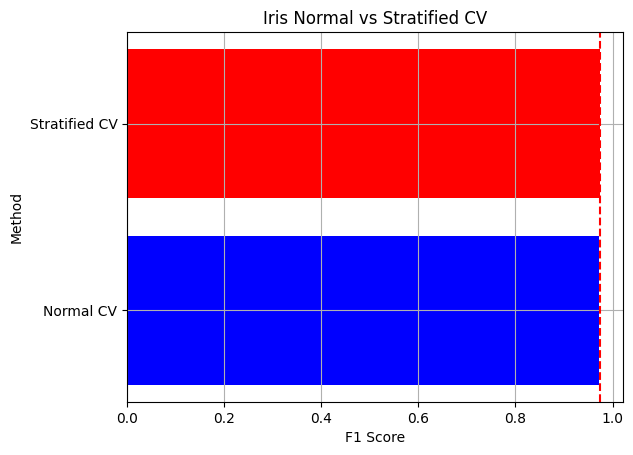

In [70]:
iris_grid_results = iris_grid.cv_results_
iris_stratifed_results = iris_stratifed.cv_results_

iris_grid_best_score = iris_grid.best_score_
iris_stratifed_best_score = iris_stratifed.best_score_

iris_grid_best_params = iris_grid.best_params_
iris_stratifed_best_params = iris_stratifed.best_params_

print(f"Iris Grid Best Score: {iris_grid_best_score}")
print(f"Iris Stratified Best Score: {iris_stratifed_best_score}")
print(f"Difference: {iris_stratifed_best_score - iris_grid_best_score}")

print(f"Iris Grid Best Params: {iris_grid_best_params}")
print(f"Iris Stratified Best Params: {iris_stratifed_best_params}")


plt.barh(
    ["Normal CV", "Stratified CV"],
    [iris_grid_best_score, iris_stratifed_best_score],
    color=["b", "r"],
)
plt.axvline(x=iris_stratifed_best_score, color="r", linestyle="--")
plt.ylabel("Method")
plt.xlabel("F1 Score")
plt.title("Iris Normal vs Stratified CV")
plt.grid()
plt.show()

Glass Grid Best Score: 0.6833740565973321
Glass Stratified Best Score: 0.7070453692492805
Diffrence: 0.02367131265194844
Glass Grid Best Params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': <function custom_gaussian_kernel at 0x0000021B17FD8400>}
Glass Stratified Best Params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}


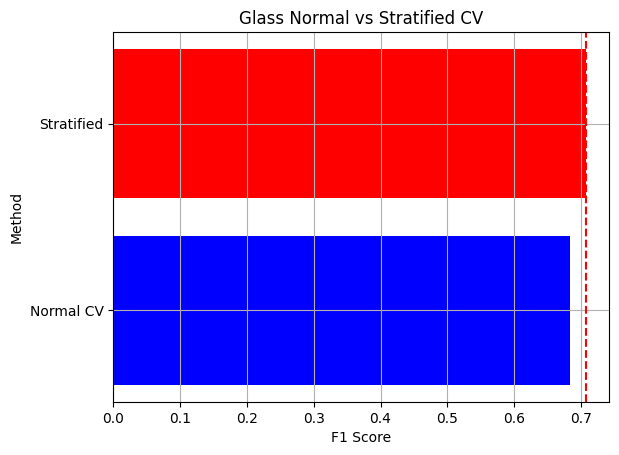

In [71]:
glass_grid_results = glass_grid.cv_results_
glass_stratifed_results = glass_stratifed.cv_results_

glass_grid_best_score = glass_grid.best_score_
glass_stratifed_best_score = glass_stratifed.best_score_

glass_grid_best_params = glass_grid.best_params_
glass_stratifed_best_params = glass_stratifed.best_params_

print(f"Glass Grid Best Score: {glass_grid_best_score}")
print(f"Glass Stratified Best Score: {glass_stratifed_best_score}")
print(f"Diffrence: {glass_stratifed_best_score - glass_grid_best_score}")

print(f"Glass Grid Best Params: {glass_grid_best_params}")
print(f"Glass Stratified Best Params: {glass_stratifed_best_params}")

plt.barh(
    ["Normal CV", "Stratified"],
    [glass_grid_best_score, glass_stratifed_best_score],
    color=["b", "r"],
)
plt.axvline(x=glass_stratifed_best_score, color="r", linestyle="--")
plt.ylabel("Method")
plt.xlabel("F1 Score")
plt.title("Glass Normal vs Stratified CV")
plt.grid()
plt.show()

Wine Grid Best Score: 0.9743847012489206
Wine Stratified Best Score: 0.9837207397578914
Difference: 0.009336038508970801
Wine Grid Best Params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}
Wine Stratified Best Params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}


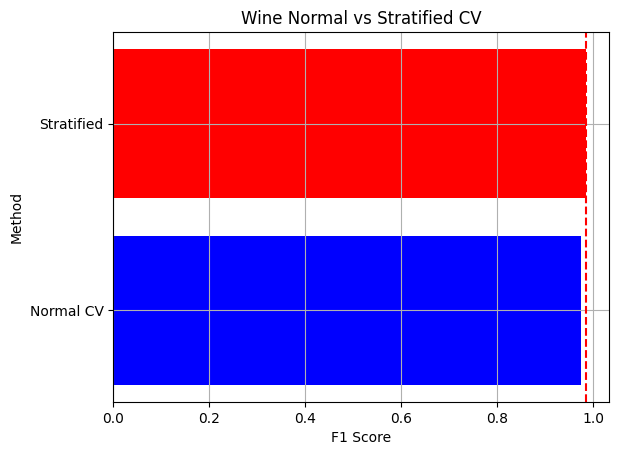

In [72]:
wine_grid_results = wine_grid.cv_results_
wine_stratifed_results = wine_stratifed.cv_results_

wine_grid_best_score = wine_grid.best_score_
wine_stratifed_best_score = wine_stratifed.best_score_

wine_grid_best_params = wine_grid.best_params_
wine_stratifed_best_params = wine_stratifed.best_params_

print(f"Wine Grid Best Score: {wine_grid_best_score}")
print(f"Wine Stratified Best Score: {wine_stratifed_best_score}")
print(f"Difference: {wine_stratifed_best_score - wine_grid_best_score}")

print(f"Wine Grid Best Params: {wine_grid_best_params}")
print(f"Wine Stratified Best Params: {wine_stratifed_best_params}")

plt.barh(
    ["Normal CV", "Stratified"],
    [wine_grid_best_score, wine_stratifed_best_score],
    color=["b", "r"],
)
plt.axvline(x=wine_stratifed_best_score, color="r", linestyle="--")
plt.ylabel("Method")
plt.xlabel("F1 Score")
plt.title("Wine Normal vs Stratified CV")
plt.grid()
plt.show()

## Kiedy KNN?

* Kiedy mamy mało danych
* Kiedy mamy mało wymiarów
* Dane są wolne od szumu


Dlaczego KNN jest `lazy learner`?

Ponieważ nie uczy się na danych, a jedynie zapamiętuje je, a następnie klasyfikuje nowe obserwacje na podstawie odległości do obserwacji zapisanych w zbiorze treningowym. Kosztowaność algorytmu znajduje się w fazie predykcji, a nie w fazie uczenia.